# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [18]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.

    R - Identify any null or missing data, and impute appropriate replacement values.

    R - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
    
2. Explore the cleaned data.

    R - View summary statistics for the numeric fields in the dataset.

    R - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    
    - Use statistics, aggregate functions, and visualizations to answer the following questions:

        R - *What are the average (mean) departure and arrival delays?*

        R - *How do the carriers compare in terms of arrival delay performance?*

        R - *Is there a noticable difference in arrival delays for different days of the week?*

        R - *Which departure airport has the highest average departure delay?*

        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*

        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        
        R - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.


### `1. Cleaning the data`

### 1.1 Null or missing data

We use the function isnull() and sum() to count the null values of every column, and we notice the only column having null values is DepDel15, with 2761 null values. Every other column is complete. 

In [19]:
null_values = df_flights.isnull().sum()
null_values

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

### 1.2 Imputation

From looking at the data, we can see that the missing values from DepDelay15 can be calculated from the column DepDelay. If we look at the definitions of each column:

**DepDelay**: The number of minutes departure was delayed.

**DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes.

So we have to check the minutes of departure delay, if it's more than 15 minutes, we add a 1 to the column DepDelay15, and if it's less than 15 minutes, we add a 0. 

In [22]:
#We use .loc[] to select rows with missing values (like a filter)
df_flights.loc[df_flights['DepDel15'].isnull(), 'DepDel15'] = df_flights.loc[df_flights['DepDel15'].isnull(), 'DepDelay'].apply(lambda x: 1 if x >= 15 else 0)

#We check missing values after imputation
df_flights.isnull().sum()


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

I also identify that the column DepDel15 is a float data type column, which is not correct, it's better to convert that column to Int due to the nature of the data (boolean).

In [25]:
df_flights['DepDel15'] = df_flights['DepDel15'].astype(int)

print(df_flights['DepDel15'].dtype)  

int64


Also we print the data again, just to check

In [26]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0


### 1.3 Outliers
Now we identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.

First of all, I will show a Violin Plot, in which we will see:

- **Outliers**: Data points that fall far outside the expected range, typically those lying beyond 1.5 times the interquartile range (IQR). Identifying outliers is crucial as they can indicate anomalies, errors, or unique cases.
  
- **Density**: This refers to the concentration of data points across the range of values. The wider areas of the violin plot indicate where most data points are concentrated, while narrower areas show lower density regions.

- **Distribution**: The overall shape of the data, showing how values are spread across different ranges. 

By using a **violin plot**, we get the combined benefits of visualizing outliers, data density, and distribution in a single, clear graphic. This makes it easier to understand the underlying structure of the data and spot important patterns that might be missed with simpler plots like a boxplot.



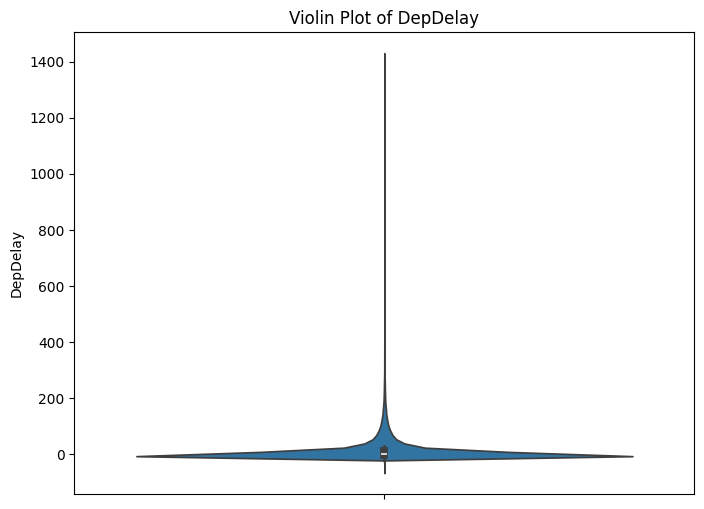

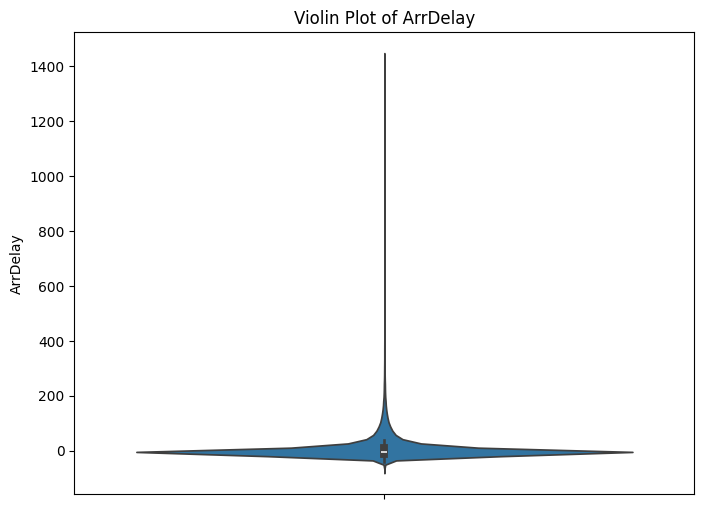

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

#Violin plot for DepDelay
plt.figure(figsize=(8, 6))
sns.violinplot(y=df_flights['DepDelay']) 
plt.title('Violin Plot of DepDelay')
plt.show()

#Violin plot for ArrDelay
plt.figure(figsize=(8, 6))
sns.violinplot(y=df_flights['ArrDelay']) 
plt.title('Violin Plot of ArrDelay')
plt.show()



Based on the graphical analysis, we observe that there are several unusually large values that deviate significantly from the rest of the data. These values appear abnormal and are likely outliers. Their magnitude suggests that they may not conform to the expected patterns of the dataset.

Addicionaly, we can check the maximum and minimun values of each column, and see that is not common to have a delay of, for example 1425 minutes. It's exagerated. 

In [33]:
# Min and max of DepDelay
min_dep_delay = df_flights['DepDelay'].min()
max_dep_delay = df_flights['DepDelay'].max()

# Min and max of ArrDelay
min_arr_delay = df_flights['ArrDelay'].min()
max_arr_delay = df_flights['ArrDelay'].max()

print(f"DepDelay: Min = {min_dep_delay}, Max = {max_dep_delay}")
print(f"ArrDelay: Min = {min_arr_delay}, Max = {max_arr_delay}")


DepDelay: Min = -63, Max = 1425
ArrDelay: Min = -75, Max = 1440


Now, to identify outliers in our dataset precisely, we will use the **Interquartile Range (IQR)** method. This method helps in detecting values that deviate significantly from the rest of the data. The steps are as follows:

1. **Quartiles**:
   - \( Q1 \): The first quartile, or the 25th percentile of the data.
   - \( Q3 \): The third quartile, or the 75th percentile of the data.

2. **Interquartile Range (IQR)**:  
   The IQR is calculated as the difference between \( Q3 \) and \( Q1 \):  
   \[
   IQR = Q3 - Q1
   \]

 Values that fall outside the following range are considered outliers:
   - **Lower Bound** = Q1 - 1.5 * IQR
   - **Upper Bound** = Q3 + 1.5 * IQR

Any values below the **Lower Bound** or above the **Upper Bound** are classified as outliers and will be removed.


In [36]:
#Bounds for DepDelay
Q1_dep = df_flights['DepDelay'].quantile(0.25)
Q3_dep = df_flights['DepDelay'].quantile(0.75)
IQR_dep = Q3_dep - Q1_dep
lower_bound_dep = Q1_dep - 1.5 * IQR_dep
upper_bound_dep = Q3_dep + 1.5 * IQR_dep

#Bounds for ArrDelay
Q1_arr = df_flights['ArrDelay'].quantile(0.25)
Q3_arr = df_flights['ArrDelay'].quantile(0.75)
IQR_arr = Q3_arr - Q1_arr
lower_bound_arr = Q1_arr - 1.5 * IQR_arr
upper_bound_arr = Q3_arr + 1.5 * IQR_arr

#Remove outliers from both DepDelay and ArrDelay
df_flights_cleaned = df_flights[
    (df_flights['DepDelay'] >= lower_bound_dep) & (df_flights['DepDelay'] <= upper_bound_dep) &
    (df_flights['ArrDelay'] >= lower_bound_arr) & (df_flights['ArrDelay'] <= upper_bound_arr)
]

Now we can visualize again our data (cleaned), and we will crearly see the differences. 

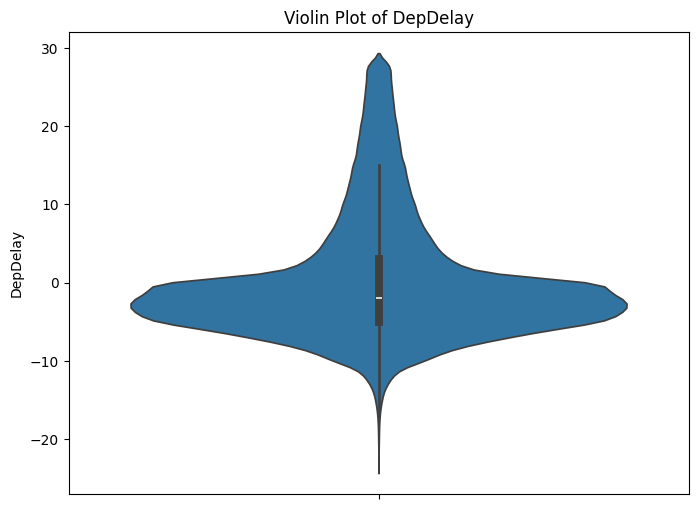

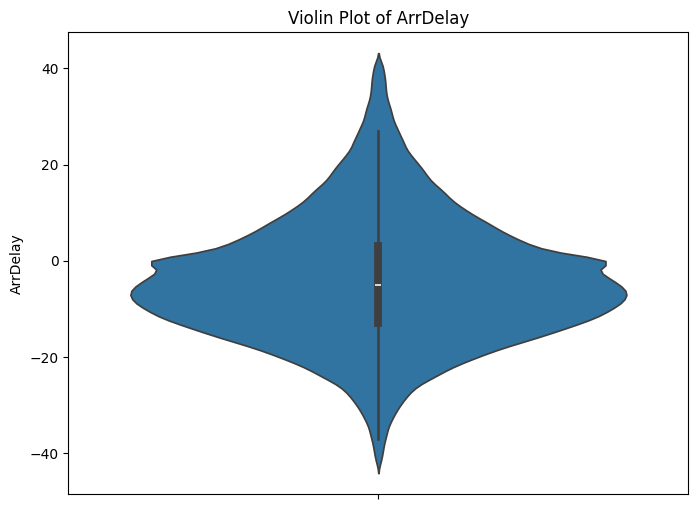

In [37]:
#Violin plot for DepDelay
plt.figure(figsize=(8, 6))
sns.violinplot(y=df_flights_cleaned['DepDelay']) 
plt.title('Violin Plot of DepDelay')
plt.show()

#Violin plot for ArrDelay
plt.figure(figsize=(8, 6))
sns.violinplot(y=df_flights_cleaned['ArrDelay']) 
plt.title('Violin Plot of ArrDelay')
plt.show()

In [38]:
df_flights_cleaned.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0,1210,-3,0,0


### `2. Exploring the data cleaned`

### 2.1 Summary statistics

To get the statistics we can apply a useful function: **describe()** which will give us a summary of the statistics of each column.

In [39]:
df_flights_cleaned.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,235067.0,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000
mean,2013.0,7.017969,15.801303,3.903555,12755.279520,12736.502418,1293.518831,0.373447,0.081492,1475.744520,-4.029843,0.099772,0.012107
std,0.0,2.003171,8.849921,1.996283,1507.709532,1504.564524,470.134495,8.029744,0.273589,488.196462,12.959713,0.299696,0.109365
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-23.000000,0.000000,1.000000,-42.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-5.000000,0.000000,1101.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1250.000000,-2.000000,0.000000,1458.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1700.000000,3.000000,0.000000,1858.000000,3.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,28.000000,1.000000,2359.000000,41.000000,1.000000,1.000000


### 2.2 Data distribution 

To show the data distribution of the **DepDelay** and **ArrDelay** columns, I will plot a histogram of each column. 

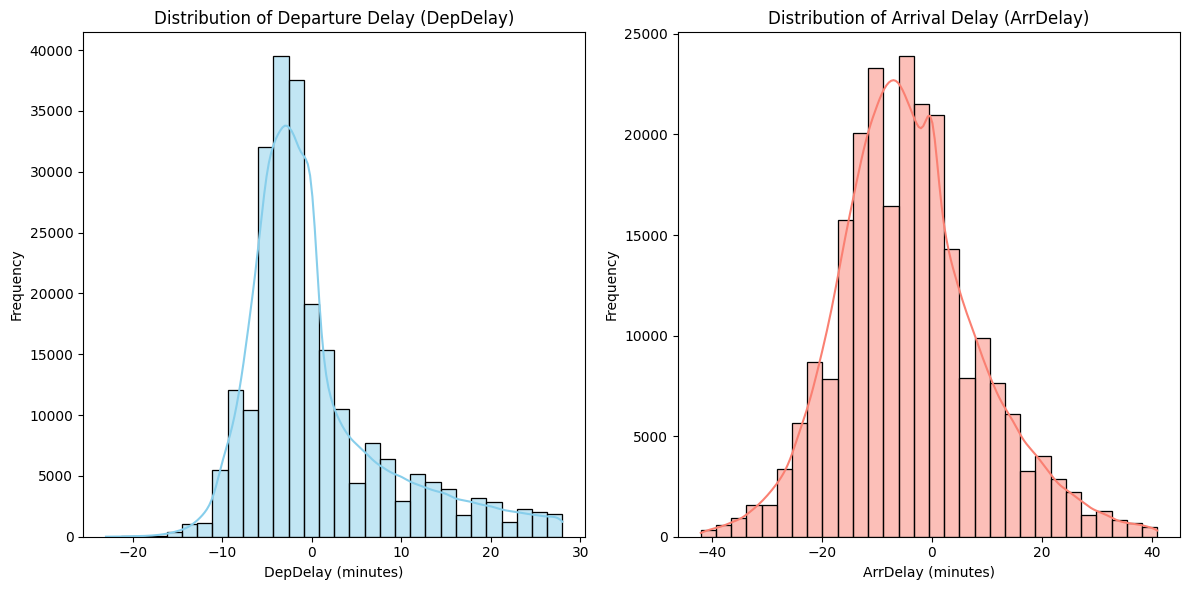

In [40]:
plt.figure(figsize=(12, 6))

#Histogram for DepDelay
plt.subplot(1, 2, 1)
sns.histplot(df_flights_cleaned['DepDelay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Departure Delay (DepDelay)')
plt.xlabel('DepDelay (minutes)')
plt.ylabel('Frequency')

#Histogram for ArrDelay
plt.subplot(1, 2, 2)
sns.histplot(df_flights_cleaned['ArrDelay'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Arrival Delay (ArrDelay)')
plt.xlabel('ArrDelay (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 2.3 Questions



**What are the average (mean) departure and arrival delays?**

This question can be answered directly from the data displayed when we use the function describe(), but also we can get the answer as follows:

In [43]:
print('Arrival delays mean:', df_flights_cleaned['ArrDelay'].mean().round(2))
print('Departure delays mean:', df_flights_cleaned['DepDelay'].mean().round(2))

Arrival delays mean: -4.03
Departure delays mean: 0.37


**How do the carriers compare in terms of arrival delay performance?**

Here is a noticable difference between the carriers, we can see that HA y AS are the best performers, while VX y EV are the worst.

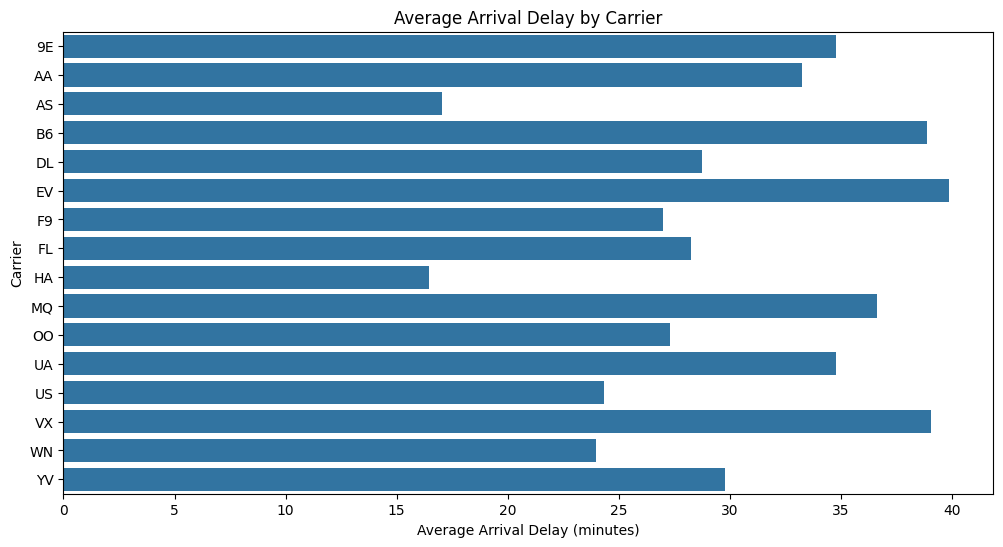

In [49]:
positive_arrival_delays = df_flights[df_flights['ArrDelay'] >= 0]

average_arrival_delay_by_carrier = positive_arrival_delays.groupby('Carrier')['ArrDelay'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='ArrDelay', y='Carrier', data=average_arrival_delay_by_carrier)

plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Carrier')

plt.show()

**Is there a noticable difference in arrival delays for different days of the week?**

There is not noticable difference in general, I'm considering only the positive values of delays, because the negatuve values are not delays, but flights with early departures. 

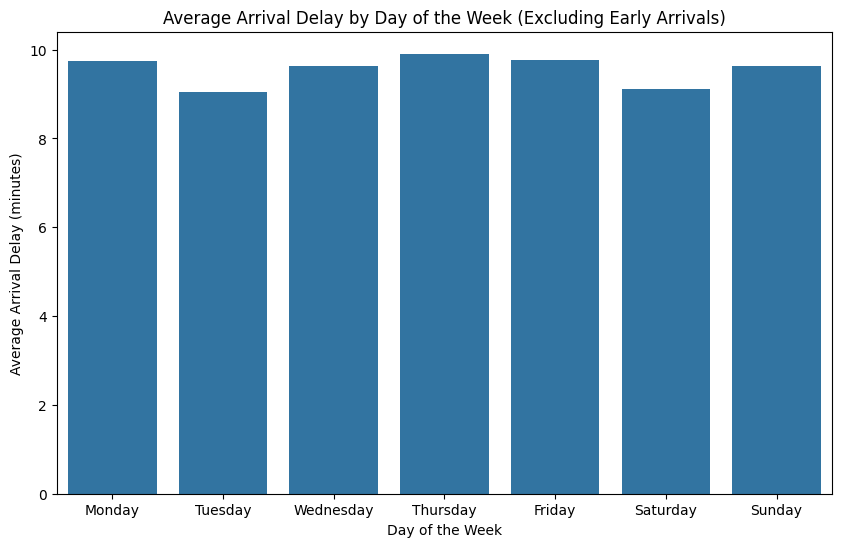

In [47]:
positive_arrival_delays = df_flights_cleaned[df_flights_cleaned['ArrDelay'] >= 0]

average_arrival_delay = positive_arrival_delays.groupby('DayOfWeek')['ArrDelay'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='ArrDelay', data=average_arrival_delay)

plt.title('Average Arrival Delay by Day of the Week (Excluding Early Arrivals)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

**Which departure airport has the highest average departure delay?**

Chicago Midway International.

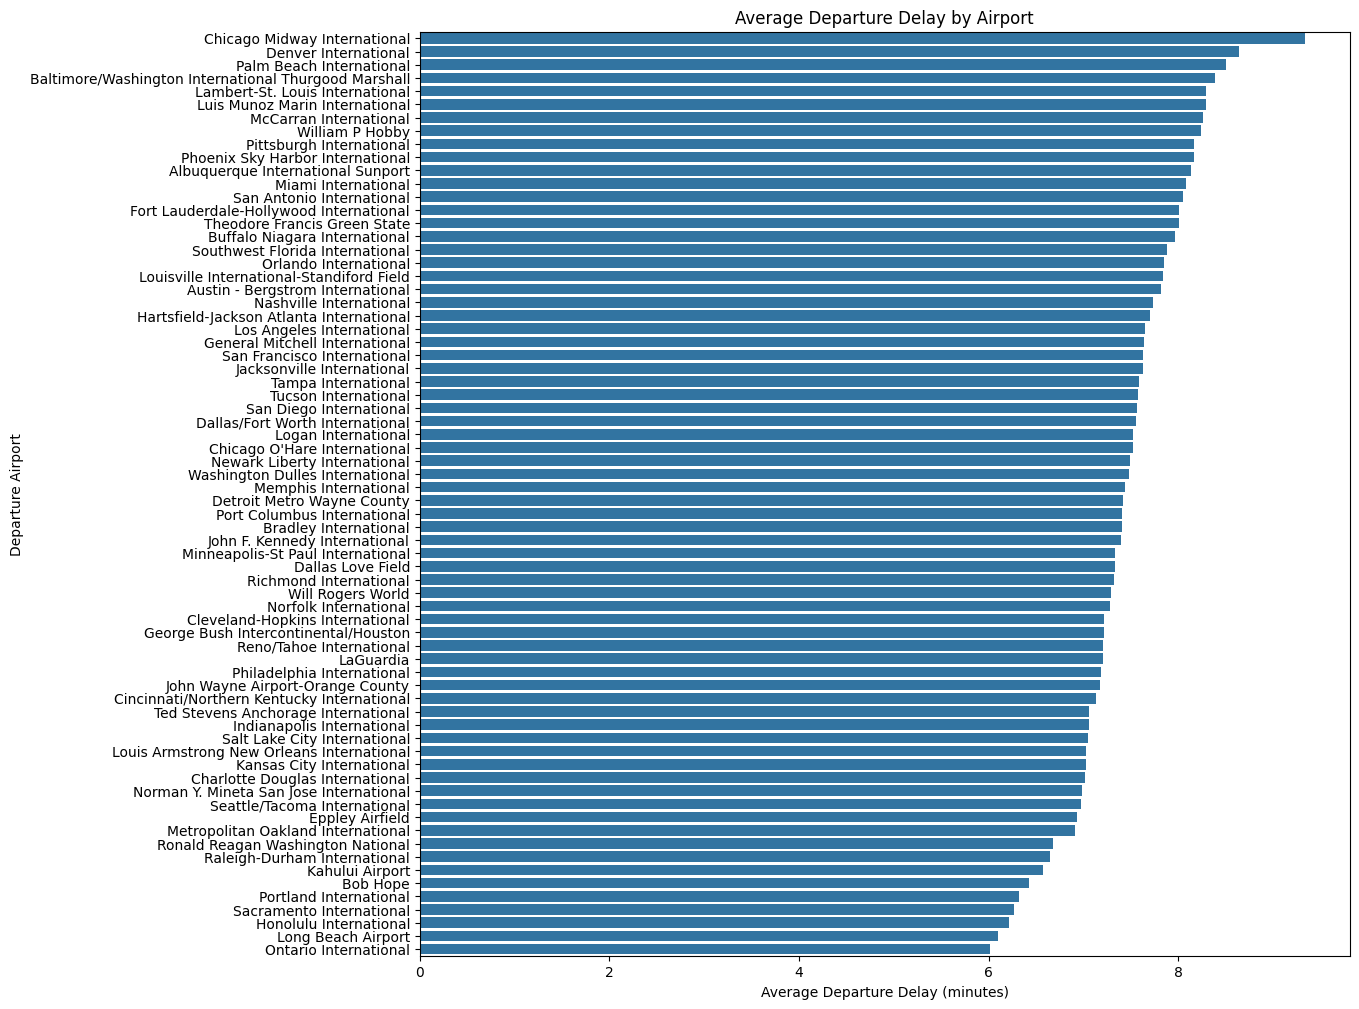

In [56]:
positive_arrival_delays = df_flights_cleaned[df_flights_cleaned['DepDelay'] >= 0]

average_dep_delay_by_airport = positive_arrival_delays.groupby('OriginAirportName')['DepDelay'].mean().reset_index()

highest_delay_airport = average_dep_delay_by_airport.loc[average_dep_delay_by_airport['DepDelay'].idxmax()]

plt.figure(figsize=(12, 12))
sns.barplot(x='DepDelay', y='OriginAirportName', data=average_dep_delay_by_airport.sort_values(by='DepDelay', ascending=False))

plt.title('Average Departure Delay by Airport')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Departure Airport')

plt.show()


**Do **late** departures tend to result in longer arrival delays than on-time departures?**

Yes, significantly. 

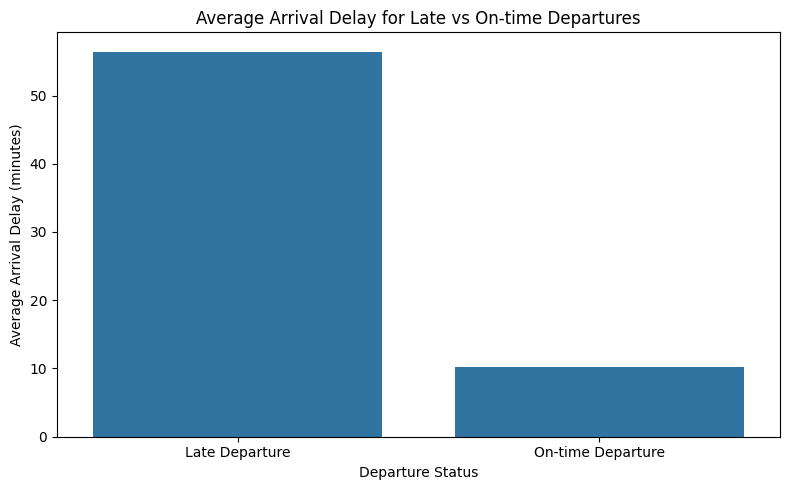

In [68]:
#Create a new column to categorize departures
df_flights['DepartureStatus'] = df_flights['DepDelay'].apply(lambda x: 'Late Departure' if x >= 15 else 'On-time Departure')

df_flights_positive = df_flights[df_flights['ArrDelay'] > 0]

average_arrival_delay = df_flights_positive.groupby('DepartureStatus')['ArrDelay'].mean().reset_index(name='AverageArrivalDelay')

plt.figure(figsize=(8, 5))
sns.barplot(x='DepartureStatus', y='AverageArrivalDelay', data=average_arrival_delay)

plt.title('Average Arrival Delay for Late vs On-time Departures')
plt.xlabel('Departure Status')
plt.ylabel('Average Arrival Delay (minutes)')
plt.tight_layout()

plt.show()


**Which route (from origin airport to destination airport) has the most **late** arrivals?**

We can see in the graphic that the route from Los Angeles to San Francisco has the most late arrivals.

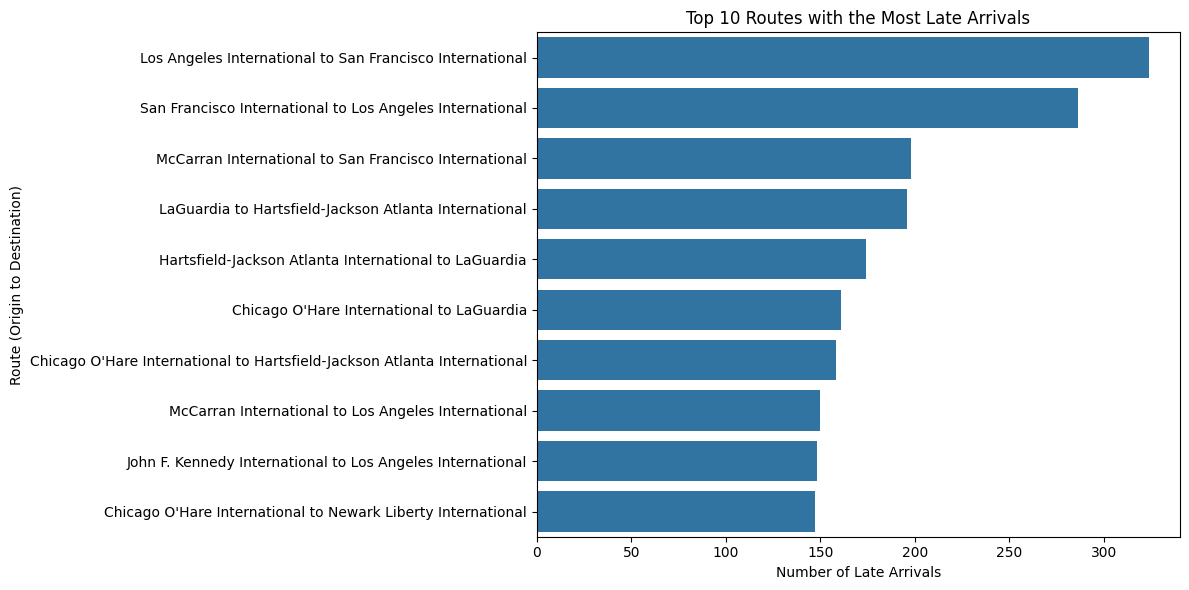

In [61]:
#Create a new column for the route (Origin to Destination)
df_flights['Route'] = df_flights['OriginAirportName'] + ' to ' + df_flights['DestAirportName']

#Filter for rows where the flight arrived late (ArrDelay15 == 1)
df_late_flights = df_flights[df_flights['ArrDel15'] == 1]


late_arrivals_by_route = df_late_flights.groupby('Route').size().reset_index(name='LateArrivals')

late_arrivals_by_route = late_arrivals_by_route.sort_values(by='LateArrivals', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='LateArrivals', y='Route', data=late_arrivals_by_route.head(10))
 
plt.title('Top 10 Routes with the Most Late Arrivals')
plt.xlabel('Number of Late Arrivals')
plt.ylabel('Route (Origin to Destination)')
plt.tight_layout()

plt.show()


**Which route has the highest average arrival delay?**

We can see in the graphic that the route from SouthWest Florida to Denver has the highest average arrival delay

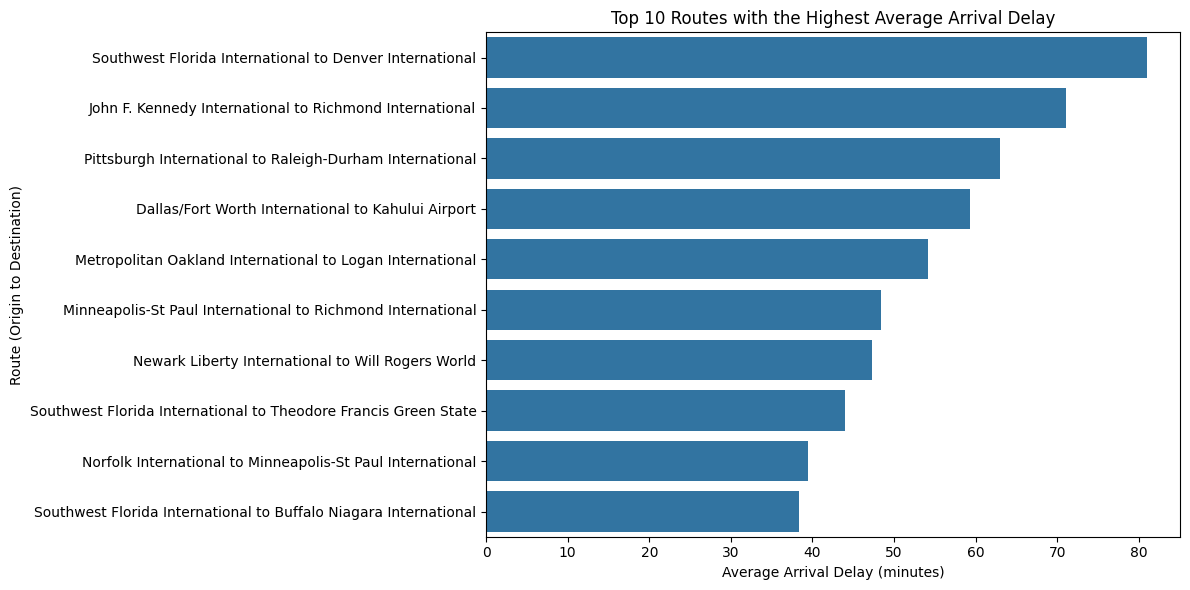

In [64]:
average_delay_by_route = df_flights.groupby('Route')['ArrDelay'].mean().reset_index(name='AverageArrivalDelay')

average_delay_by_route = average_delay_by_route.sort_values(by='AverageArrivalDelay', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='AverageArrivalDelay', y='Route', data=average_delay_by_route.head(10))


plt.title('Top 10 Routes with the Highest Average Arrival Delay')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Route (Origin to Destination)')
plt.tight_layout()

plt.show()
